**Executed by Sudhanshu Kumar | sudhanshukumar15678@gmail.com**

# Fraud detection using SOM

In [ ]:
##Install MiniSom Package
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=826589ed063e41fd79e52d841b3ac9c91936048ace28cd9ea645d8ad57a0ff14
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
# Self Organizing Maps

# Importing Required Libraries
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Importing the dataset
dataset = pd.read_csv('creditcard.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y) # Not used anywhere for training or testing because this is an unsupervised algorithm.
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)

   CustomerID  A1     A2     A3  A4  A5  ...  A10  A11  A12  A13   A14  Class
0    15776156   1  22.08  11.46   2   4  ...    0    1    2  100  1213      0
1    15739548   0  22.67   7.00   2   8  ...    0    0    2  160     1      0
2    15662854   0  29.58   1.75   1   4  ...    0    1    2  280     1      0
3    15687688   0  21.67  11.50   1   5  ...   11    1    2    0     1      1
4    15715750   1  20.17   8.17   2   6  ...   14    0    2   60   159      1

[5 rows x 16 columns]

Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.000000

In [ ]:
# X is all columns except last one class
# Y is Class - we use it to verify after clustering (SOM) is done 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [ ]:
print(dataset.shape)
print(dataset.describe())

(690, 16)
         CustomerID          A1  ...            A14       Class
count  6.900000e+02  690.000000  ...     690.000000  690.000000
mean   1.569047e+07    0.678261  ...    1018.385507    0.444928
std    7.150647e+04    0.467482  ...    5210.102598    0.497318
min    1.556571e+07    0.000000  ...       1.000000    0.000000
25%    1.563169e+07    0.000000  ...       1.000000    0.000000
50%    1.569016e+07    1.000000  ...       6.000000    0.000000
75%    1.575190e+07    1.000000  ...     396.500000    1.000000
max    1.581544e+07    1.000000  ...  100001.000000    1.000000

[8 rows x 16 columns]


In [ ]:
# Training the SOM
from minisom import MiniSom
# x & y are the dimentions of the map
# input_len is the number of input neurons
# sigma is the radius of the centroid neurons
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [ ]:
som = MiniSom(x=10,y=10,input_len=15)

In [ ]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [ ]:
som.distance_map().shape

(10, 10)

#visualisation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


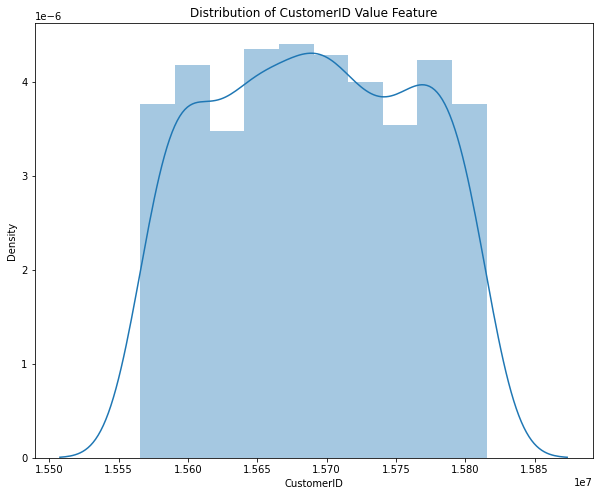

In [ ]:

plt.figure(figsize=(10,8))
plt.title('Distribution of CustomerID Value Feature')
sns.distplot(dataset.CustomerID)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


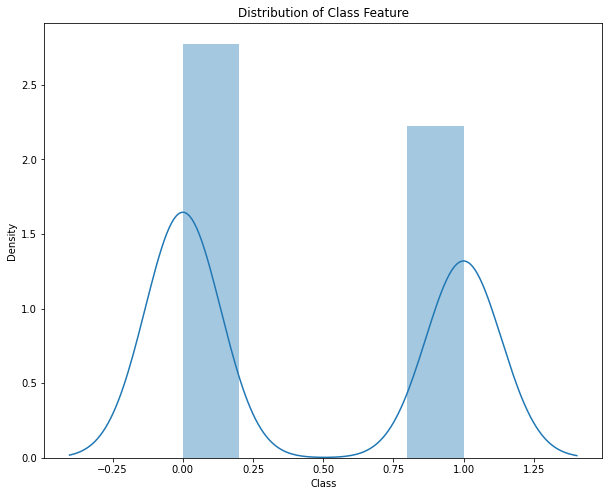

In [ ]:

#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Class Feature')
sns.distplot(dataset.Class)

In [ ]:
# visualizing the results 
from pylab import bone, colorbar, pcolor, plot, show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

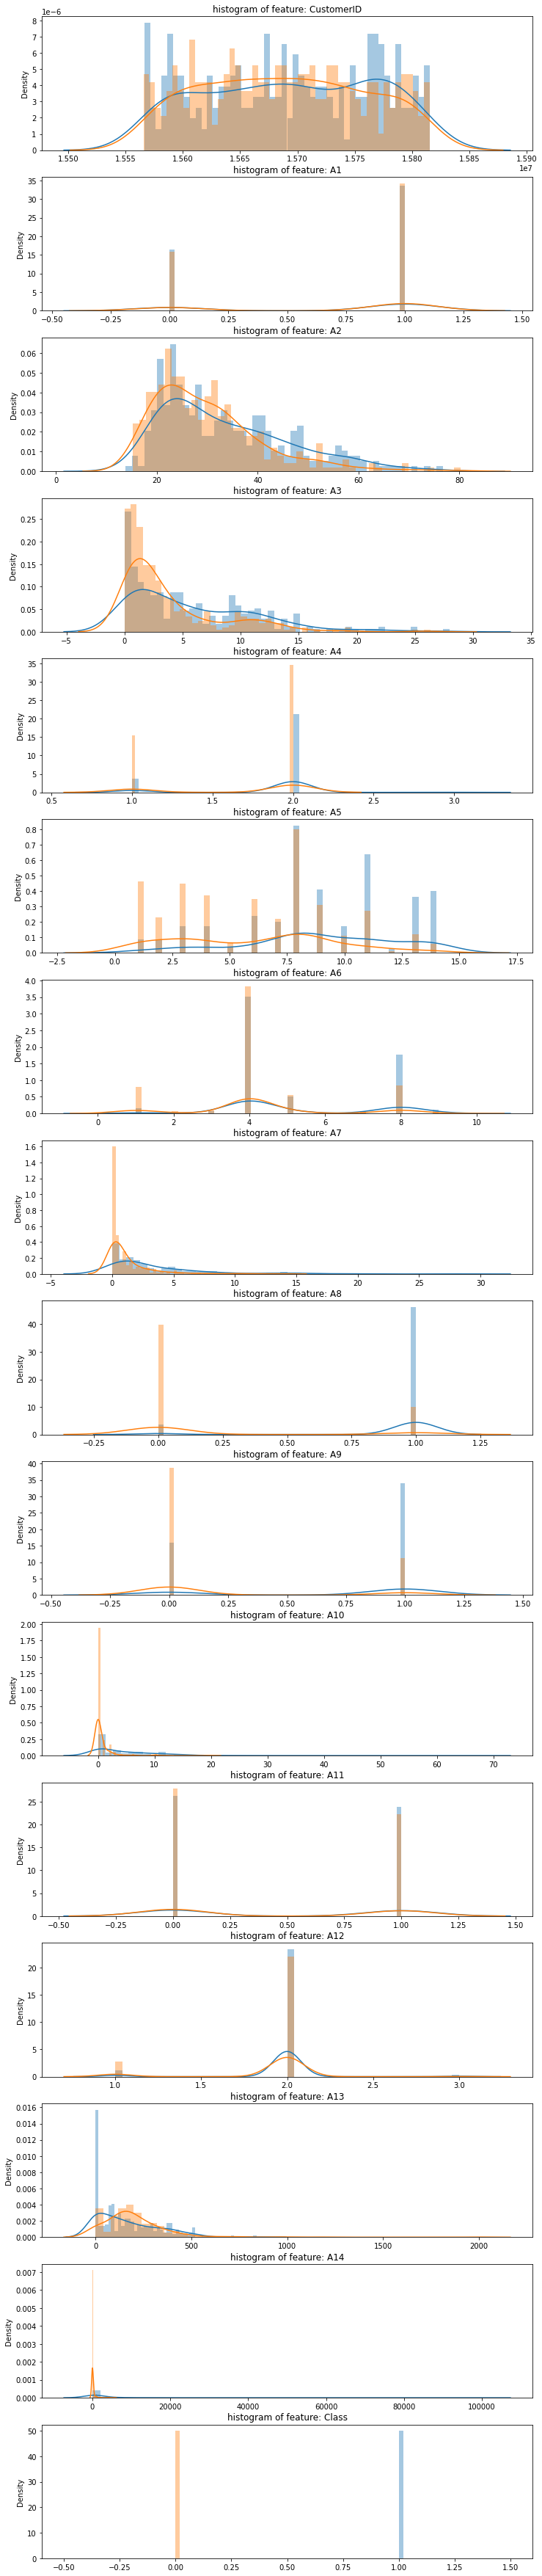

In [ ]:
# distribution of anomalous features
features = dataset.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(dataset[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(dataset[c][dataset.Class == 1], bins=50)
 sns.distplot(dataset[c][dataset.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

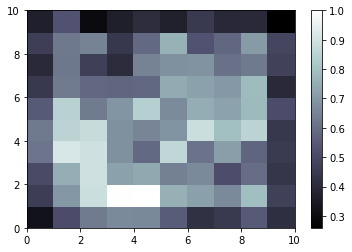

In [ ]:
bone()
pcolor(som.distance_map().T)
colorbar()

The above shows the map , but we also need to find whether the customers in the winning neurons have been successful with their applications

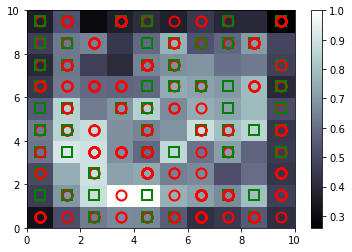

In [ ]:
# use markers o for class 0 in y 
# use square (s) for class 1 in y
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] #red circles -> customers who didn't get approval
colors = ['r', 'g'] # green square -> customers who got  approval
for i, x in enumerate(X):  # loop over customer database , for each customer vector
    w = som.winner(x)  # getting the winning node for the particular customer
    plot(w[0] + 0.5, # x coordinate of winning node = w[0]
         w[1] + 0.5, # y coordinate of the winning node = w[1], adding 0.5 to put marker in middle of square
         markers[y[i]],# association between customer approval and markers
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

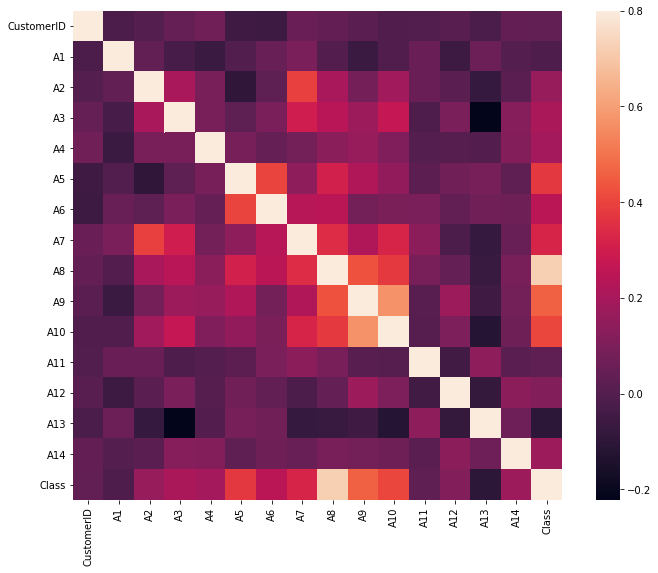

In [ ]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

We find winning outlier neurons which have green squares to identify potential frauds

In [ ]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(3, 9), (4, 3), (2, 4), (4, 1), (1, 1), (4, 5), (4, 7), (2, 6), (6, 4), (7, 6), (6, 6), (9, 7), (1, 9), (9, 6), (0, 9), (3, 3), (5, 8), (0, 2), (9, 1), (6, 5), (9, 3), (2, 3), (2, 8), (1, 5), (9, 5), (7, 9), (0, 8), (4, 2), (0, 6), (5, 0), (7, 1), (1, 7), (6, 1), (1, 6), (5, 6), (9, 9), (7, 8), (4, 9), (4, 4), (7, 3), (2, 2), (0, 0), (3, 6), (8, 6), (6, 0), (8, 8), (9, 4), (9, 2), (6, 9), (5, 7), (3, 5), (1, 4), (1, 3), (2, 1), (0, 1), (6, 8), (0, 4), (7, 5), (8, 0), (5, 2), (7, 4), (0, 7), (7, 0), (5, 9), (5, 3), (0, 3), (4, 0), (4, 8), (3, 0), (1, 8), (6, 3), (3, 1), (8, 4), (5, 5), (2, 0), (8, 1), (4, 6), (5, 1), (1, 0), (0, 5), (6, 2), (9, 0)])

In [ ]:

# Finding the frauds
# winning maps are the white blocks in the visualization plotted above. White blocs shows the potential fraud customers. 
# mappings are in the form of dictionary
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)

# mappings[(x,y)], here x & y are the coordinates of the white blocks in the winning maps.
# axis=0 will arrange the concatinated winning blocks one below other i.e. in vertical order.
frauds = np.concatenate((mappings[(1,2)], mappings[(6,8)]), axis = 0)

# get the original values in the dataset
frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(9, 9): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
       0.        , 0.        , 0.00298246, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
       5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 8.00000000e-02, 4.00000000e-04]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.63723877, 1.        , 0.31954887, 0.08928571, 0.5       ,


The above values are scaled down values . Hence we use inverse transform to get actual customer records

In [ ]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

In [ ]:
from keras.models import Sequential # Used for initializing our NN
from keras.layers import Dense # Used for building hidden layers

classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)
y_pred = classifier.predict(customers)

# Concatinate the above calculated y_pred with the 1st column of our dataset
# to amalgamate all customers with their respective potential fraud probablilities.
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

# Sort the customers w.r.t the least to max probablilities of potential fraud.
y_pred = y_pred[y_pred[:,1].argsort()]

In [ ]:
# Going from unsupervised to supervised part where ANN is used to train our model.
# Matrix of features
customers = dataset.iloc[:,1:].values # last column is not considered

# Create dependent variable
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

The above list shows customers who the bank needs to investigate 

## Printing the Fraudulent Clients


In [ ]:
# Create an output CSV file
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df